# Imports


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile


import shapefile  # This is part of the PyShp package

%matplotlib inline

In [2]:
print(os.getcwd())
print(os.listdir('.'))

t:\EY_Challenge\EY_Challenge\Rough Work
['Footprint_Data.ipynb', 'Yolo_WIth_PrePost.ipynb']


## Download the Datasets

In [3]:
# Uncomment what you need - Only do this one time and be sure to recomment it after running

# !wget https://challenge.ey.com/api/v1/storage/admin-files/Post_Event_San_Juan.tif -O ../Datasets/Post_Event_San_Juan.tif
# !wget https://challenge.ey.com/api/v1/storage/admin-files/Pre_Event_San_Juan.tif -O ../Datasets/Pre_Event_San_Juan.tif
# !wget https://challenge.ey.com/api/v1/storage/admin-files/027282564879278492-65c1f5242482662856c6d3ee-Buildins%20Footprint%20ROI.zip -O ../Datasets/Building_Footprint_ROI.zip

In [4]:
# # Use this to extract the building footprint dataset

# zip_path = '../Datasets/Building_Footprint_ROI.zip'
# extract_path = '../Datasets/Building_Footprint_ROI'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)


In [3]:
pre_event_image = '../Datasets/Pre_Event_San_Juan.tif'
post_event_image = '../Datasets/Post_Event_San_Juan.tif'
footprint_data = '../'
building_shp = '../Datasets/Building_Footprint_ROI/Buildins Footprint ROI/building_footprint_roi_challenge.shp'


## Load the Footprint Data

In [6]:
#!pip install PyShp

In [7]:
points = []
indicies = []

with shapefile.Reader(building_shp) as shp:
    for shape in shp.shapes():
        points.append(shape.points)
        indicies.append(shape.parts)


In [8]:
len(points), len(indicies)

(281572, 281572)

In [9]:
indicies[10]

[0]

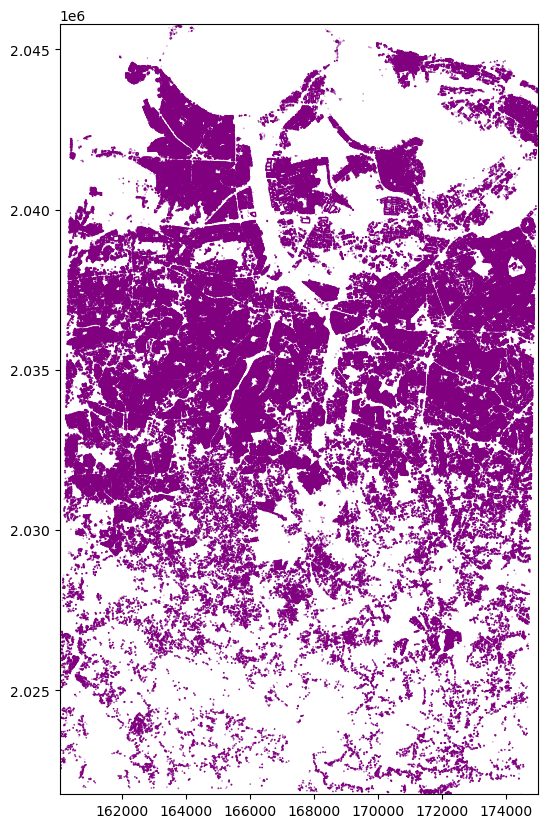

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def plot_shapefile(shapefile_path):
    # Read the shapefile
    with shapefile.Reader(shapefile_path) as shp:
        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(10, 10))
        
        # Iterate through the shapes and records in the shapefile
        for shape in shp.shapes():
            # Make sure we're dealing with polygons
            if shape.shapeType == shapefile.POLYGON:
                # Extract the points from the shape
                points = shape.points
                indices = shape.parts
                indices.append(len(points))  # Ensures the last shape is processed
                for i in range(len(indices) - 1):
                    polygon_points = points[indices[i]:indices[i + 1]]
                    # Create a polygon patch and add it to the axis
                    poly = Polygon(polygon_points, closed=True, edgecolor='purple', facecolor='none')
                    ax.add_patch(poly)
        
        # Set the x and y axis limits to the bounds of the shapefile
        bounds = shp.bbox
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        
        # Set axis aspect to equal for correct scaling
        ax.set_aspect('equal')
        
        # Return the axis
        return ax

# Replace 'path_to_your_shapefile.shp' with the path to your actual shapefile
footprint_data_ax = plot_shapefile(building_shp)

# Show the plot
plt.show()


In [ ]:
x, y = 5000, 30000  # replace these with the coordinates of the top-left corner of your segment you are interested in

zoomed_in_segment = pre_event_data[y:y+512, x:x+512]

# Create a new figure and axis for the zoomed-in segment
fig, ax = plt.subplots(figsize=(10, 10))

# Display the zoomed-in segment
ax.imshow(zoomed_in_segment, cmap='Reds')

# Show the plot
plt.show()

## Layer the Footprint Data with the Satellite Imagery

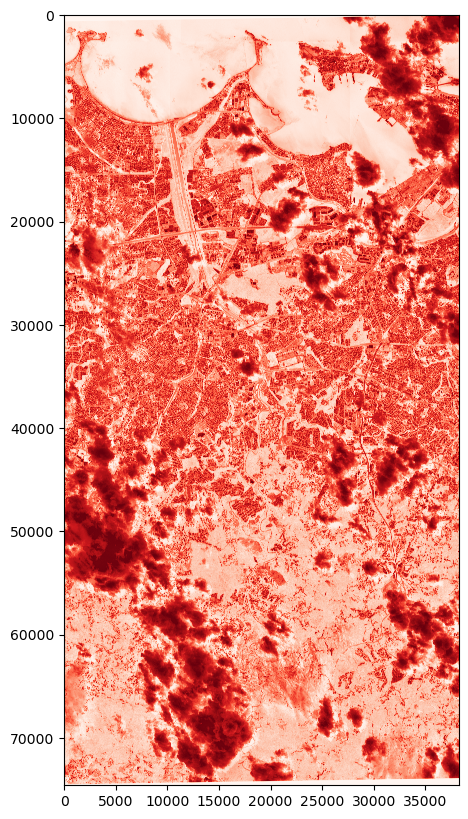

In [11]:
# Load the pre-event image

with rasterio.open(pre_event_image) as src:
    pre_event_data = src.read(1)
    fig, ax1 = plt.subplots(figsize=(10, 10))
    ax1.imshow(pre_event_data,cmap='Reds')
plt.show()
    

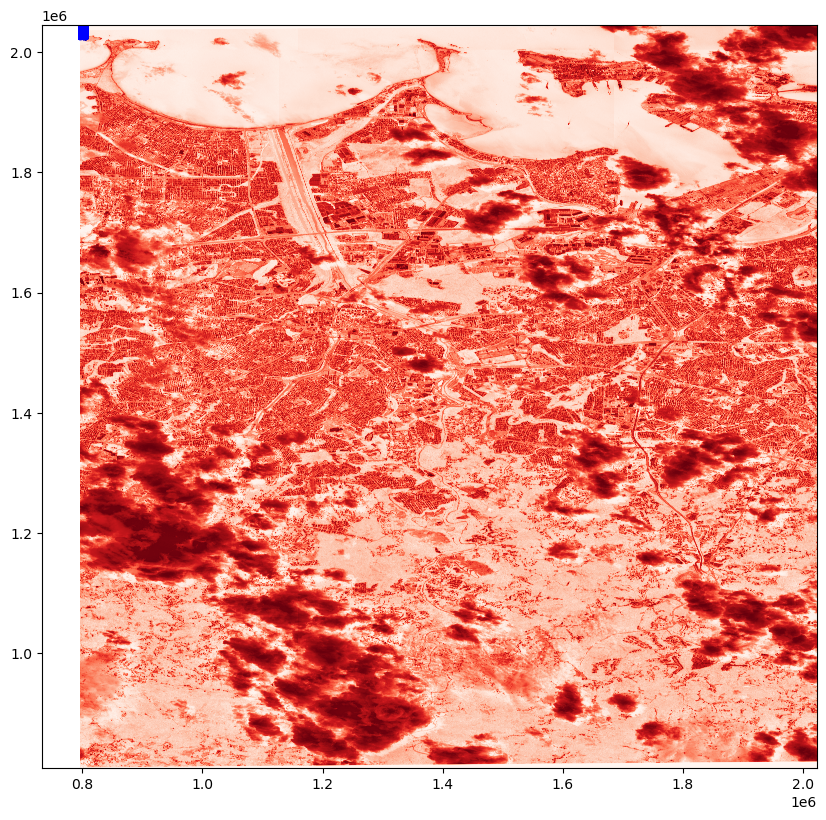

In [4]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd  # This is a common library for handling geospatial data

# Load the raster image
with rasterio.open(pre_event_image) as src:
    pre_event_data = src.read(1)

# Load the footprint data
# Replace 'footprint_data_path' with the actual path to your footprint data file
footprints = gpd.read_file(building_shp)

# Ensure the footprint data is in the same CRS as the image
# You can skip this step if they are already in the same CRS
if footprints.crs != src.crs:
    footprints = footprints.to_crs(src.crs)

# Plot the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(pre_event_data, cmap='Reds', extent=src.bounds)

# Overlay the footprint data
footprints.boundary.plot(ax=ax, color='blue', linewidth=1)  # Adjust color and linewidth as needed

# Show the plot
plt.show()


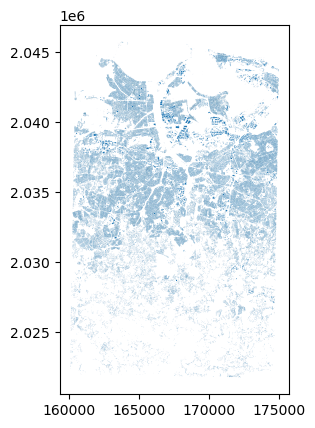

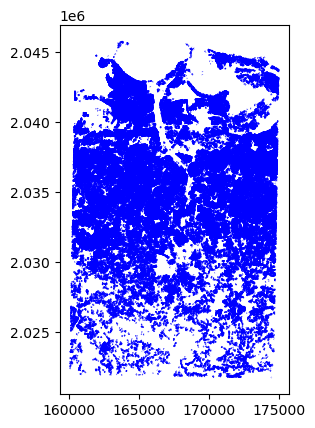

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your footprint data into a GeoDataFrame
# Replace 'path_to_your_footprint_data' with the actual path to your footprint data file
footprints = gpd.read_file(building_shp)

# Plot the footprint data
# This will use the default plotting with polygons filled and outlined
footprints.plot()

# Optionally, you can customize the plot
# For example, if you want to plot the boundaries of the polygons in blue without filling:
footprints.boundary.plot(color='red', linewidth=1)

# Show the plot
plt.show()


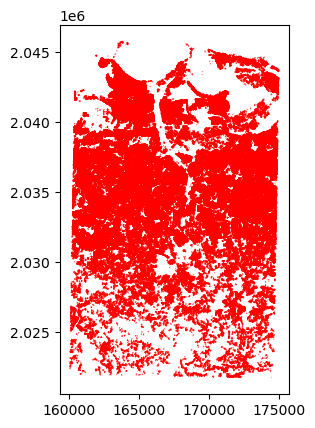

In [10]:
# Optionally, you can customize the plot
# For example, if you want to plot the boundaries of the polygons in blue without filling:
footprints.boundary.plot(color='red', linewidth=1)

# Show the plot
plt.show()

In [6]:
footprints.crs

<Projected CRS: EPSG:32619>
Name: WGS 84 / UTM zone 19N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 19N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
src.crs

CRS.from_epsg(32619)

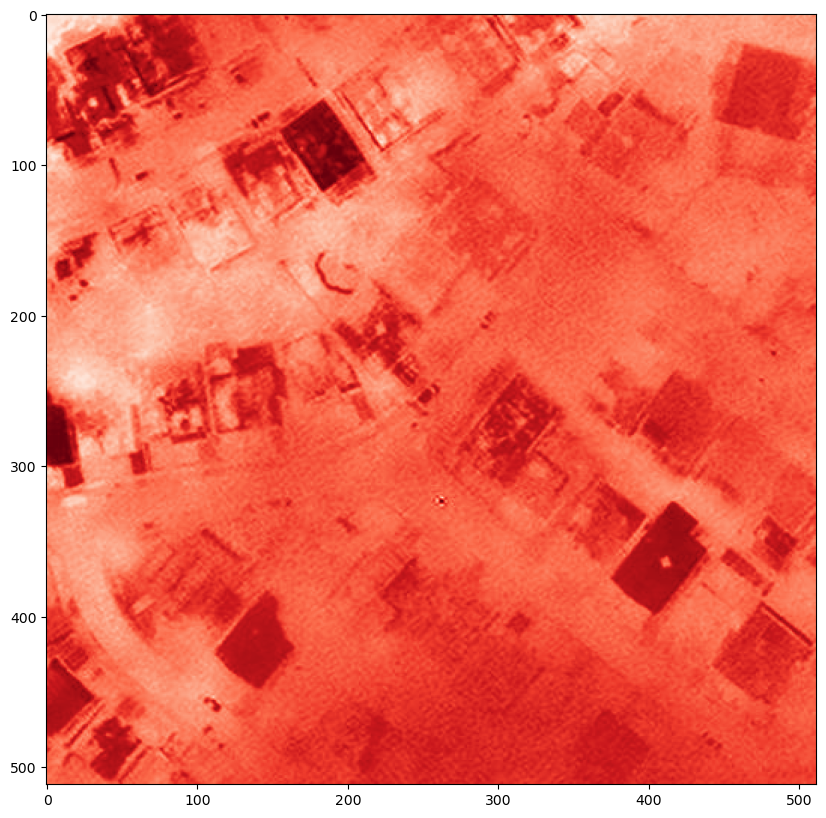

In [12]:
x, y = 5000, 30000  # replace these with the coordinates of the top-left corner of your segment you are interested in

zoomed_in_segment = pre_event_data[y:y+512, x:x+512]

# Create a new figure and axis for the zoomed-in segment
fig, ax = plt.subplots(figsize=(10, 10))

# Display the zoomed-in segment
ax.imshow(zoomed_in_segment, cmap='Reds')

# Show the plot
plt.show()
